# 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 02. Importing data 

In [2]:
path = r'C:\Users\ideal\OneDrive\Desktop\CF Tasks\Advanced Analytics & Dashboards Design'

In [3]:
# Downloading the full merged Brazilian E-commerce dataset
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ecommerce_final_merge.pkl'))

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,1.0,credit_card,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,3.0,voucher,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,2.0,voucher,1.0,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,9350.0,maua,SP,1.0,credit_card,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,9350.0,maua,SP,3.0,voucher,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [6]:
df.shape

(18079641, 39)

In [7]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [8]:
# Duplicates
print(df.duplicated().sum())

5704849


In [9]:
# Drop duplicates
df.drop_duplicates()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,1.0,credit_card,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,3.0,voucher,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,2.0,voucher,1.0,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,9350.0,maua,SP,1.0,credit_card,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,9350.0,maua,SP,3.0,voucher,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18079635,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,006619bbed68b000c8ba3f8725d5409e,ececbfcff9804a2d6b40f589df8eef2b,2018-03-15 10:55:42,68.50,18.36,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR,83750.0,-25.760605,-49.730156,lapa,PR,14407.0,franca,SP,1.0,debit_card,1.0,86.86,beleza_saude,45.0,569.0,1.0,150.0,16.0,7.0,15.0,health_beauty
18079636,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,006619bbed68b000c8ba3f8725d5409e,ececbfcff9804a2d6b40f589df8eef2b,2018

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(12374792, 39)

# 03. Hypothesis 
### Hypothesis: There is a relationship between the weight of a product ('product_weight_g') and the freight cost ('freight_value'). Specifically, we hypothesize that heavier products tend to have higher freight costs due to increased shipping expenses.

### This hypothesis assumes that the weight of a product might influence the freight cost, I will  test this relationship through linear regression analysis.

# 04. Creating and analyzing the subset: 'product_weight_g' and 'freight_value'

In [14]:
subset = df[['product_weight_g', 'freight_value']].dropna()

# Assigning X and y
X = subset[['product_weight_g']]
y = subset['freight_value']


In [15]:
# a subset of product_weight and freight_value created
subset

,product_weight_g,freight_value
0,500.0,8.72
1,500.0,8.72
2,500.0,8.72
3,500.0,8.72
4,500.0,8.72
...,...,...
18079635,150.0,18.36
18079636,150.0,18.36
18079637,150.0,18.36
18079639,150.0,18.36


In [16]:
# Consistency Check
print(subset.describe())  

       product_weight_g  freight_value
count      1.228690e+07   1.228690e+07
mean       2.157044e+03   1.974055e+01
std        3.836287e+03   1.500347e+01
min        0.000000e+00   0.000000e+00
25%        3.000000e+02   1.351000e+01
50%        7.000000e+02   1.632000e+01
75%        1.850000e+03   2.068000e+01
max        4.042500e+04   4.096800e+02


In [17]:
# Missing Values
print(subset.isnull().sum())  # No missing values

product_weight_g    0
freight_value       0
dtype: int64


In [18]:
subset['freight_value'].mean() # Check the mean

19.740554603005116

In [19]:
subset['freight_value'].median() # Check the median

16.32

In [20]:
subset['freight_value'].max() # Check the median

409.68

# 05. Data preparation for regression analysis

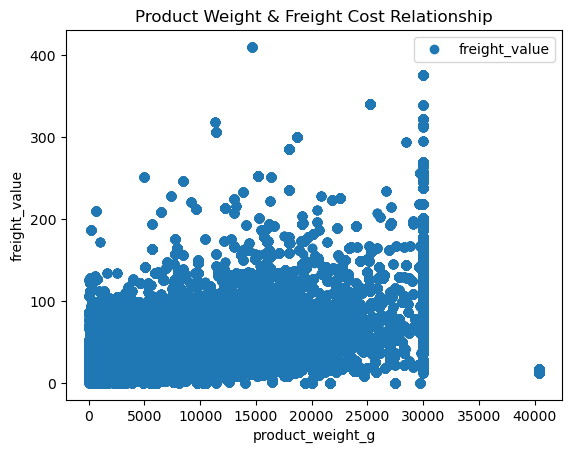

In [21]:
# Creating a scatterplot to see how the variables plot against each-other

subset.plot(x = 'product_weight_g', y='freight_value',style='o') 
plt.title('Product Weight & Freight Cost Relationship')  
plt.ylabel('freight_value') 
plt.xlabel('product_weight_g')  
plt.show()

In [23]:
# Reshaping the variables into NumPy arrays and puting them into separate objects.

X = subset['product_weight_g'].values.reshape(-1,1)
y = subset['freight_value'].values.reshape(-1,1)

In [24]:
X

array([[500.],
       [500.],
       [500.],
       ...,
       [150.],
       [150.],
       [150.]])

In [25]:
y

array([[ 8.72],
       [ 8.72],
       [ 8.72],
       ...,
       [18.36],
       [18.36],
       [18.36]])

In [26]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 06. Regression analysis

In [27]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [28]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

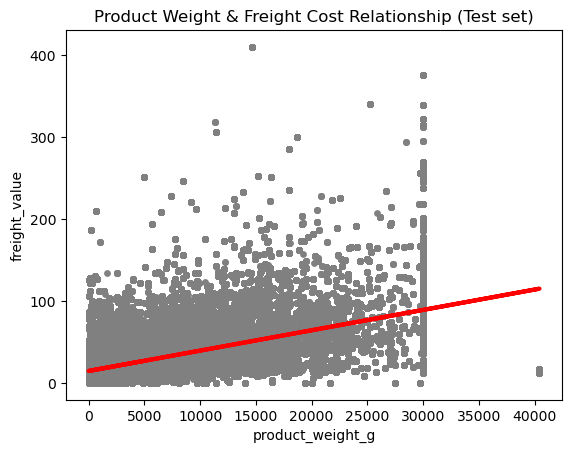

In [31]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Product Weight & Freight Cost Relationship (Test set)')
plot_test.xlabel('product_weight_g')
plot_test.ylabel('freight_value')
plot_test.show()

In [33]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # Mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score. 

In [34]:
# Printing the model summary statistics. Evaluating the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00248281]]
Mean squared error:  134.09947275322148
R2 score:  0.40111453149642506


In [35]:
y_predicted

array([[15.13444594],
       [39.09352505],
       [18.94803615],
       ...,
       [15.57638543],
       [31.39682606],
       [26.1829332 ]])

In [36]:
# Creating a dataframe - comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,15.40,15.134446
1,25.74,39.093525
2,21.05,18.948036
3,11.85,15.631007
4,18.67,15.208930
5,18.16,18.362094
6,13.07,16.574473
7,7.39,15.042582
8,15.38,15.010306
9,19.80,34.624474


#### The comparison of actual and predicted values reveals generally accurate predictions, with notable discrepancies in specific rows (1, 9, 13, 19, etc.). Close alignment suggests model accuracy, while identified outliers, especially in Row 29, warrant further evaluation and potential refinements to enhance predictive accuracy.

## Comparing how the regression fits the training set

In [37]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00248281]]
Mean squared error:  134.86667265089923
R2 score:  0.4022226874839645


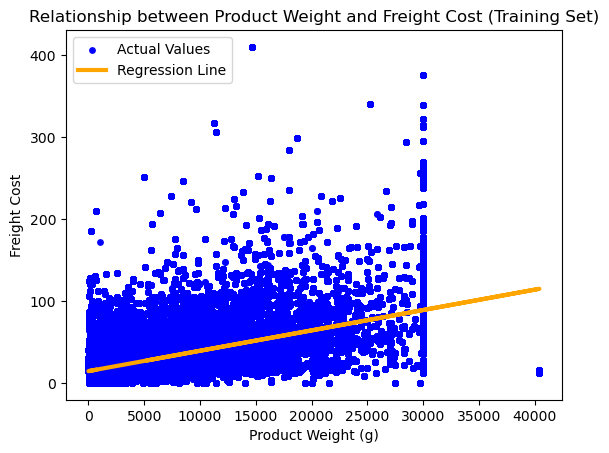

In [40]:
# Visualizing the training set results.
plot_train = plt

# Scatter plot for the training set
plot_train.scatter(X_train, y_train, color='blue', s=15, label='Actual Values')

# Regression line plot for the training set
plot_train.plot(X_train, y_predicted_train, color='orange', linewidth=3, label='Regression Line')

# Title and labels
plot_train.title('Relationship between Product Weight and Freight Cost (Training Set)')
plot_train.xlabel('Product Weight (g)')
plot_train.ylabel('Freight Cost')

# Show legend
plot_train.legend()

# Show the plot
plot_train.show()


# 07. Summary and Conclusions 


## Slope:
#### The slope of approximately 0.0025 signifies that, on average, for every one-unit increase in product weight (in grams), the freight cost increases by 0.0025 units.

## Mean Squared Error (MSE):
#### The MSE, around 133.38, gauges the average squared difference between actual and predicted freight costs. Lower MSE values indicate a closer fit between predicted and actual values. In our case, the number is pretty high, but also the data set is very large (millions of rows with a lot of variables).
## R2 Score:
#### With an R2 score of approximately 0.40 (40%), your model explains around 40% of the variance in freight costs based on product weight. Higher R2 scores indicate a better fit, and 40% suggests a statistically significant relationship.

## Interpretation of Hypothesis:
#### The positive slope implies a positive relationship between product weight and freight cost. As product weight increases, freight costs tend to rise accordingly.

#### The R2 score of 0.40 indicates that the model explains a substantial portion (40%) of freight cost variance based on product weight. However, there are other unaccounted factors influencing freight costs.

## In Conclusion:
#### The analysis provides evidence supporting the hypothesis of a relationship between product weight and freight cost. However, acknowledging unexplored factors influencing freight costs, further investigation may enhance predictive accuracy.